# Baseline Results
In this notebook we wish to explore the assignment and exam results in more depth. We will look at the percentiles of scores for differnt assignments to get a better sense of how the results are distributed. We also need this information later to be able to compare a baseline with the accuracy of a model. 

In [1]:
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt

# Load data into panda-frames and inspect

In [2]:
filenames = glob.glob("../data/*")

In [3]:
dataframes = []
for i, filename in enumerate(filenames): 
    print(i, filename.split("/")[-1])
    df = pd.read_csv(filename)
    dataframes.append(df)
    display(df)

0 studentAssessment.csv


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


1 studentInfo.csv


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


2 courses.csv


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


3 assessments.csv


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


4 studentVle.csv


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


5 vle.csv


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


6 studentRegistration.csv


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [4]:
studentAssessments_df = dataframes[0]
studentInfo_df = dataframes[1]
courses_df = dataframes[2]
assessments_df = dataframes[3]
studentVle_df = dataframes[4]
vle_df = dataframes[5]
studentRegistration_df = dataframes[6]

## Merge studentAssesments, assessments and courses for full score overview

In [5]:
merged_assessment_df = pd.merge(studentAssessments_df, assessments_df, on=['id_assessment'], how='left')
merged_assessment_df = pd.merge(merged_assessment_df, courses_df, on=['code_module', 'code_presentation'], how='left')

In [6]:
merged_assessment_df

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,268
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,268
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,268
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,268
...,...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0,269
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0,269
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0,269
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0,269


## Plot histograms of each assessment picked from one course module

In [7]:
def plot_module_assessment_stats(code_module, code_presentation): 
    module_assessments_df = merged_assessment_df[(merged_assessment_df.code_module==code_module)&(merged_assessment_df.code_presentation==code_presentation)]
    print(f"Number of students: {len(module_assessments_df['id_student'].unique())}")
    # plot general score box plot
    #module_assessments_df['score'].plot.box()
    #plt.show()
    # boxplot of each assessment in course
    module_assessments_df.boxplot(by=['date', 'id_assessment', 'assessment_type'], column='score', grid=False, figsize=(8, 5), rot=45)
    plt.show()
    # histogram each assessment in course
    module_assessments_df.hist(by=['date', 'id_assessment', 'assessment_type'], column='score', bins=10, grid=False, figsize=(10, 6))
    plt.show()
    return 1

Code module: AAA, code presentation: 2013J
Number of students: 365


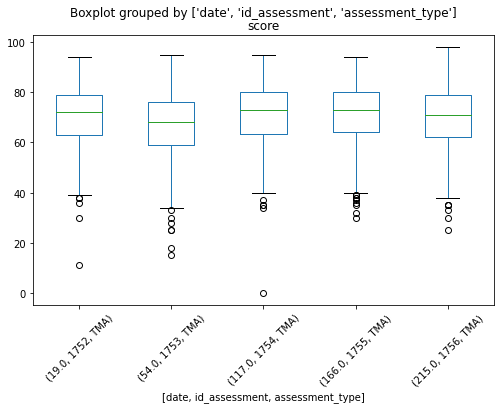

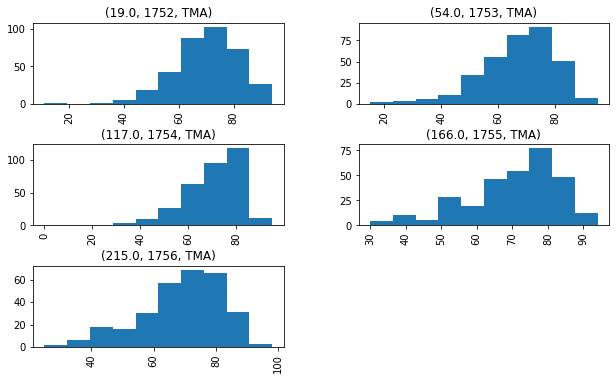

Code module: AAA, code presentation: 2014J
Number of students: 340


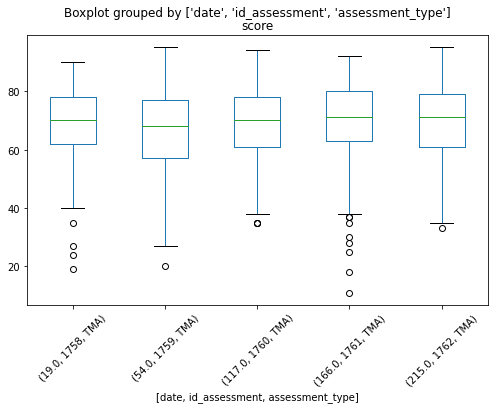

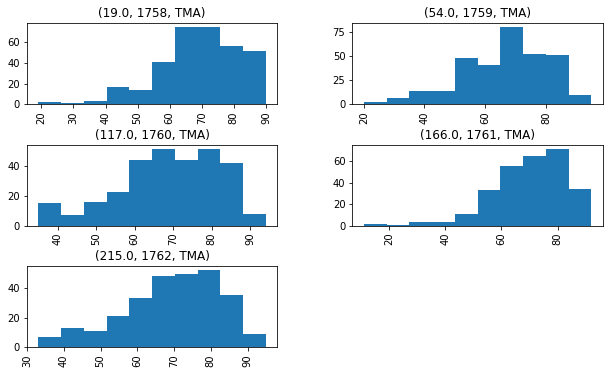

Code module: BBB, code presentation: 2013J
Number of students: 1710


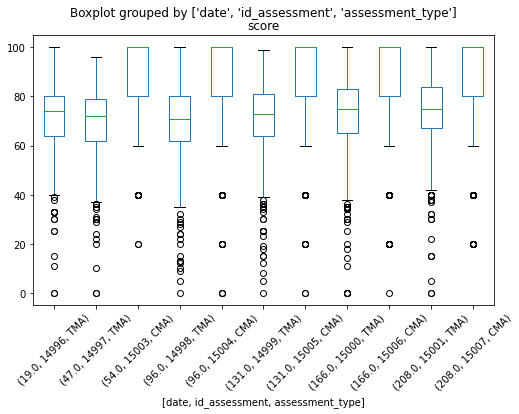

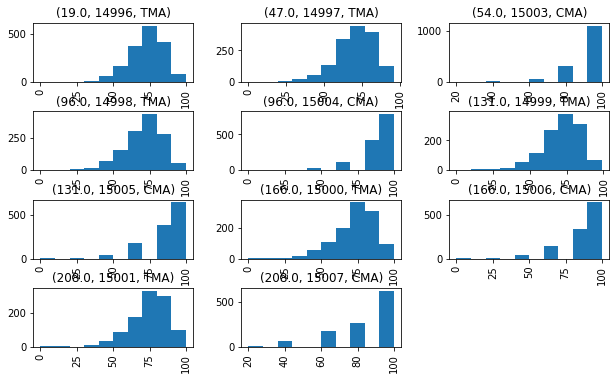

Code module: BBB, code presentation: 2014J
Number of students: 1793


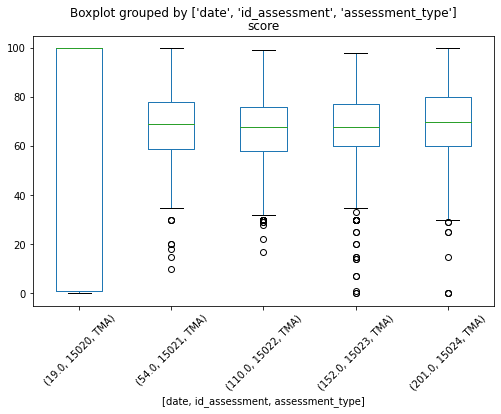

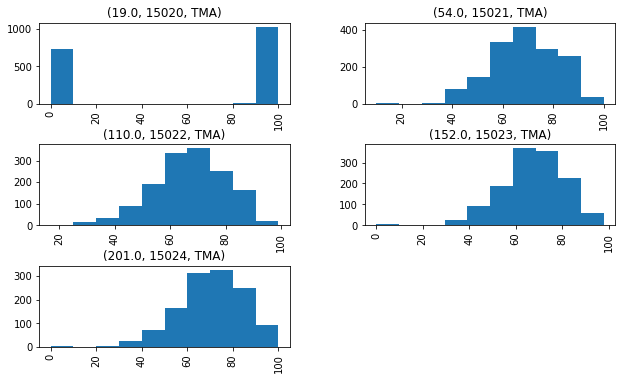

Code module: BBB, code presentation: 2013B
Number of students: 1369


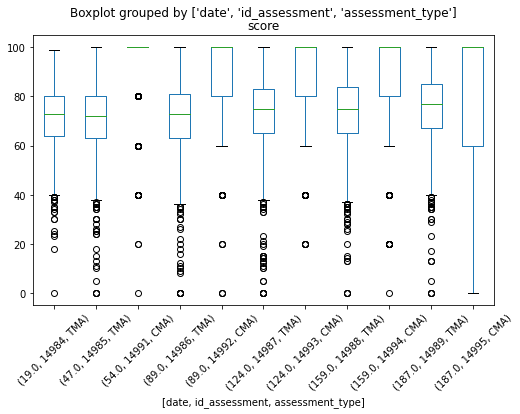

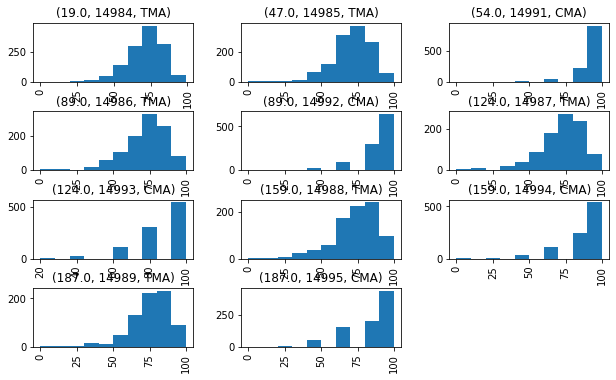

Code module: BBB, code presentation: 2014B
Number of students: 1205


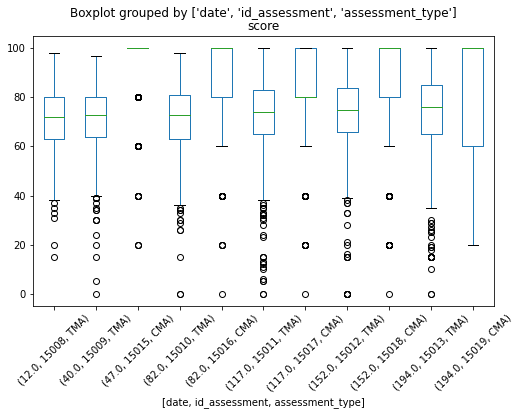

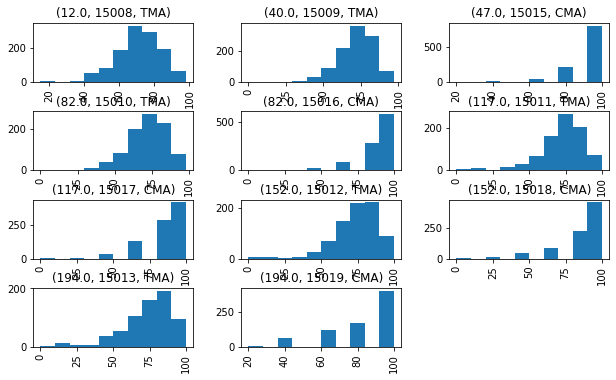

Code module: CCC, code presentation: 2014J
Number of students: 1998


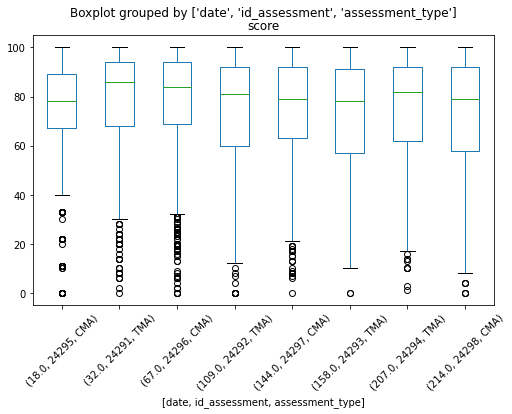

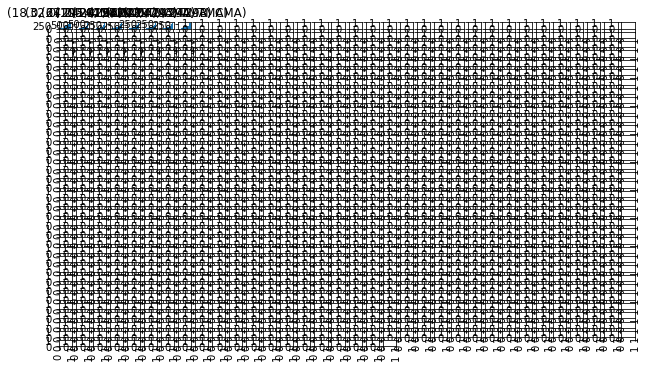

Code module: CCC, code presentation: 2014B
Number of students: 1415


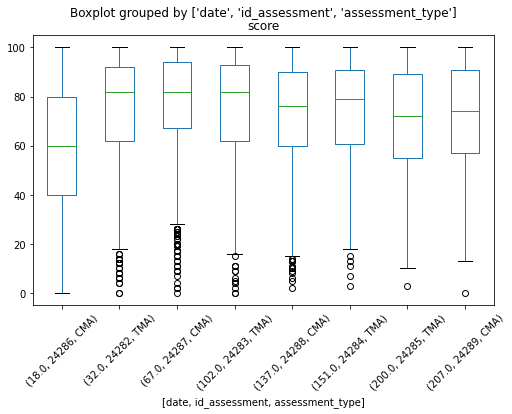

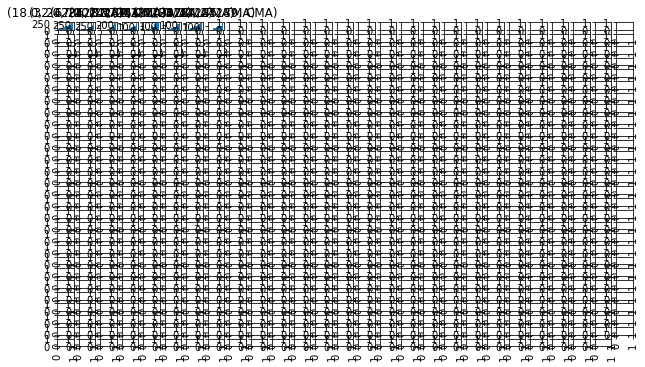

Code module: DDD, code presentation: 2013J
Number of students: 1507


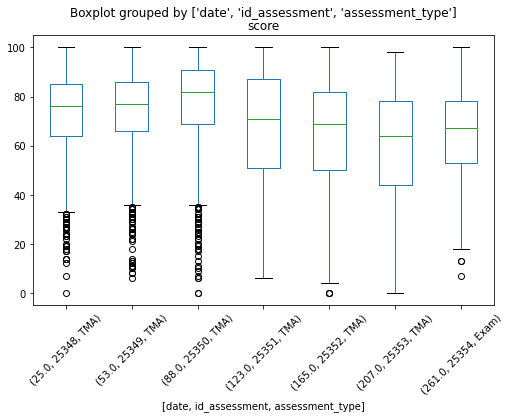

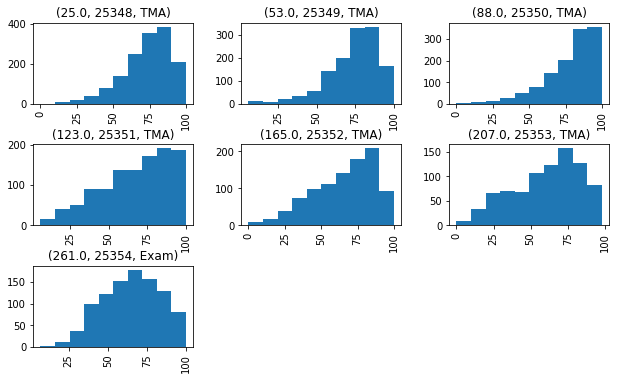

Code module: DDD, code presentation: 2014J
Number of students: 1428


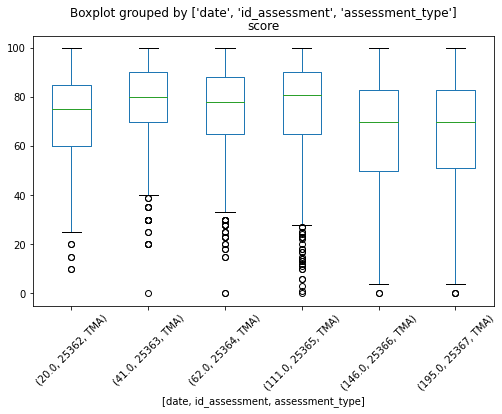

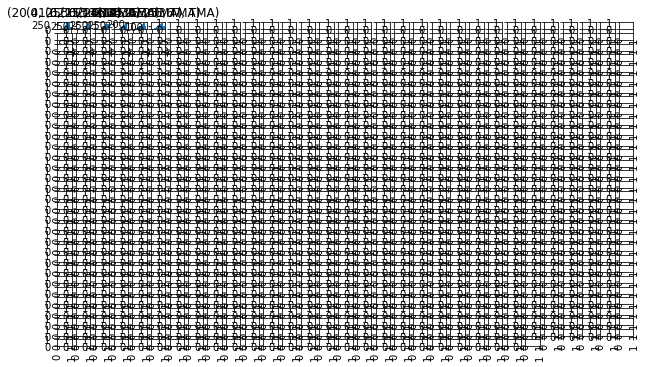

Code module: DDD, code presentation: 2013B
Number of students: 1065


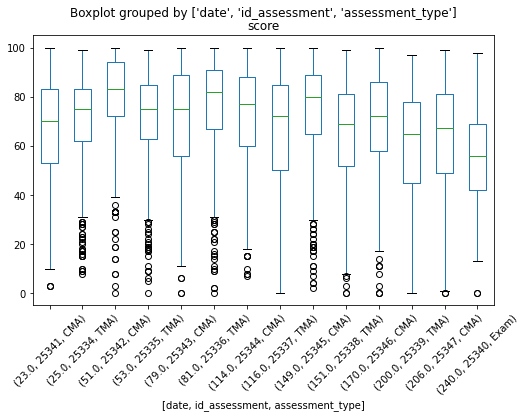

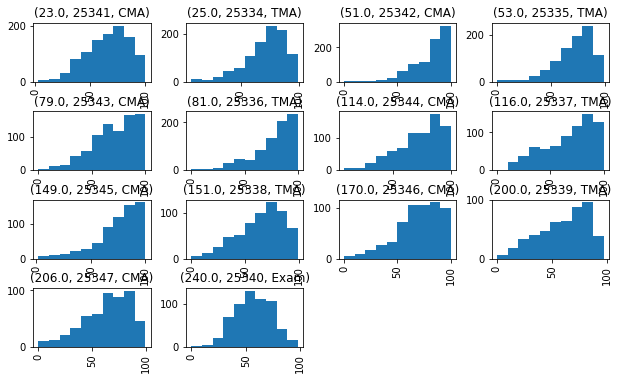

Code module: DDD, code presentation: 2014B
Number of students: 944


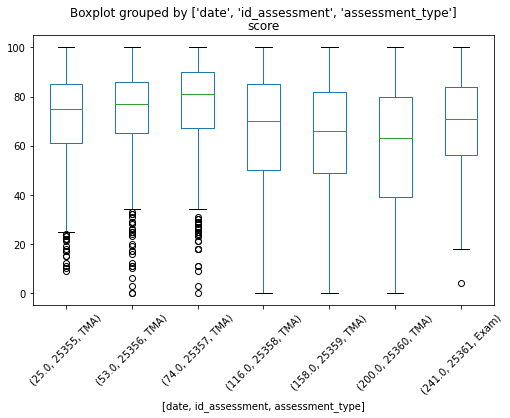

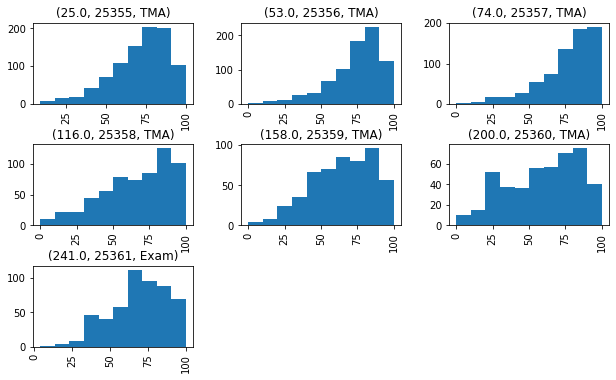

Code module: EEE, code presentation: 2013J
Number of students: 827


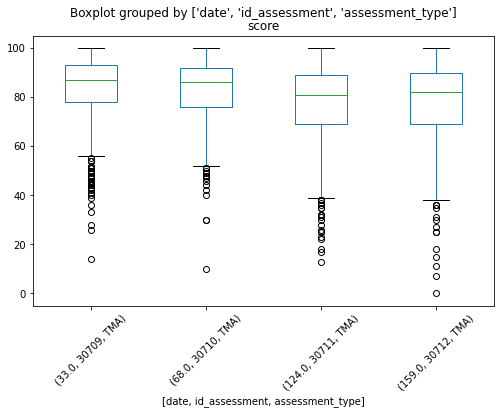

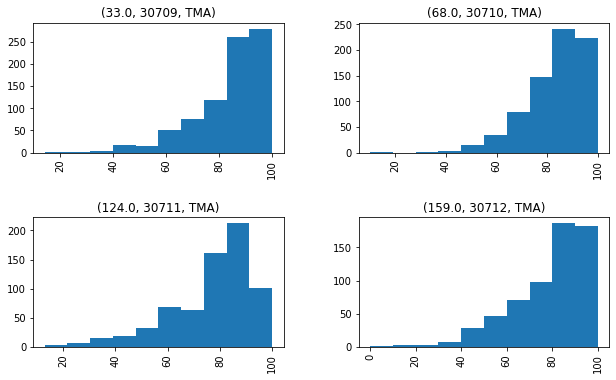

Code module: EEE, code presentation: 2014J
Number of students: 935


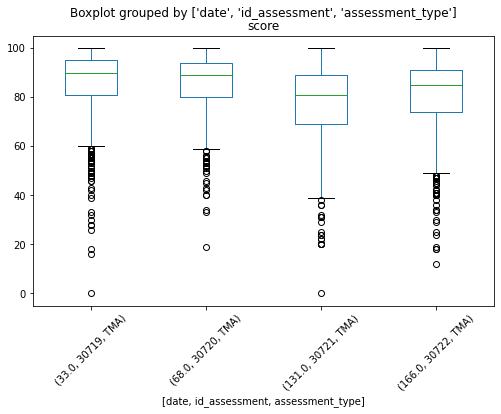

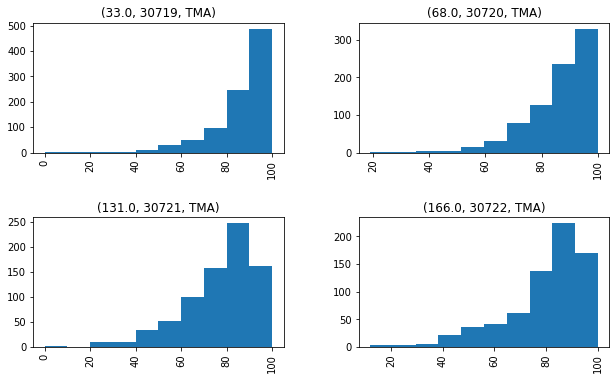

Code module: EEE, code presentation: 2014B
Number of students: 536


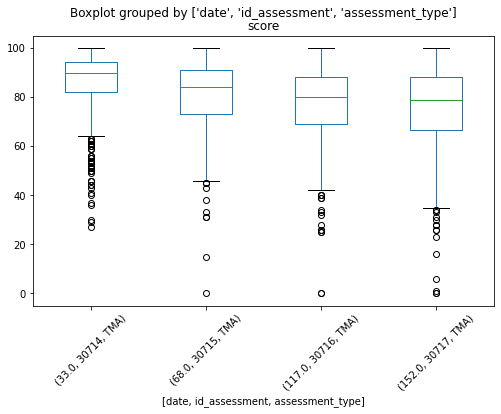

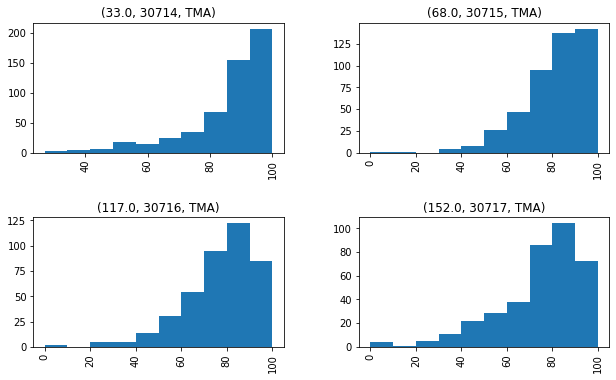

Code module: FFF, code presentation: 2013J
Number of students: 1874


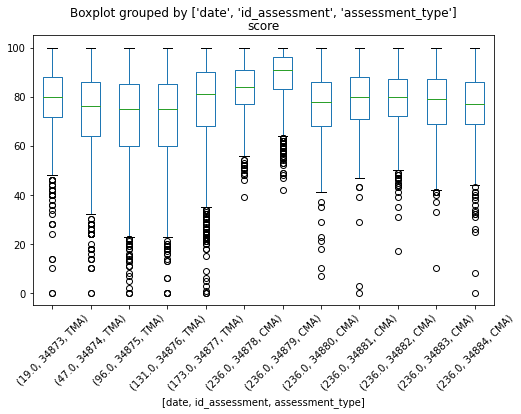

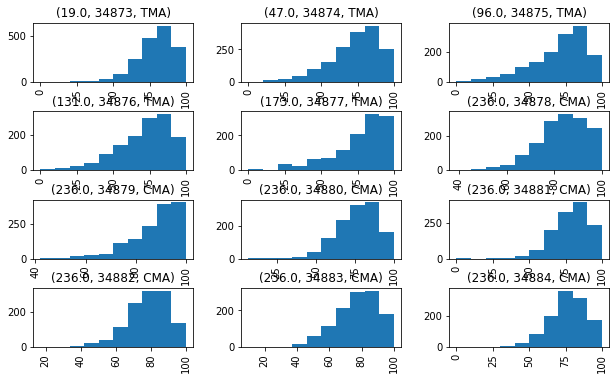

Code module: FFF, code presentation: 2014J
Number of students: 1843


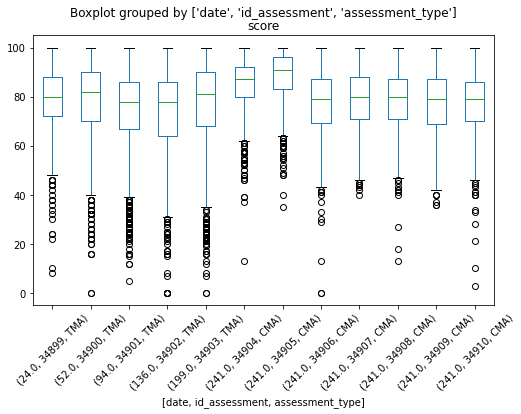

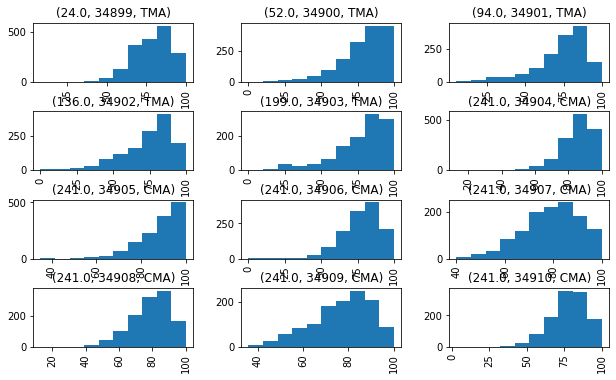

Code module: FFF, code presentation: 2013B
Number of students: 1371


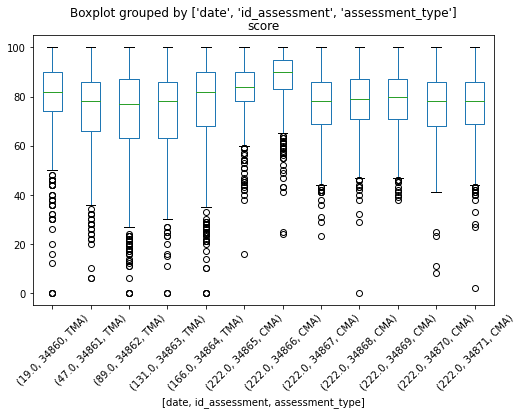

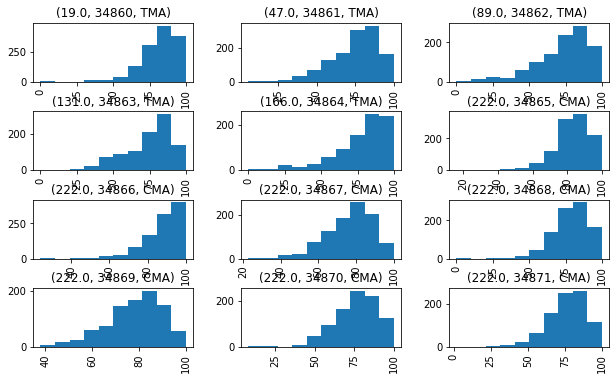

Code module: FFF, code presentation: 2014B
Number of students: 1206


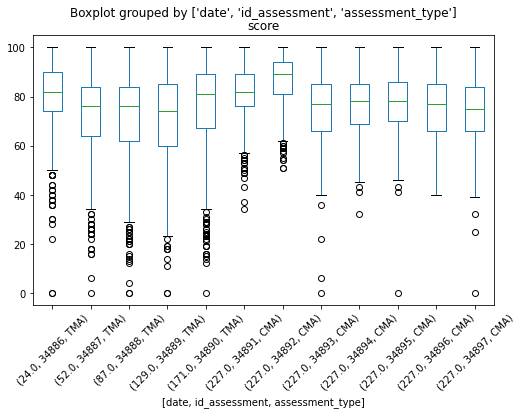

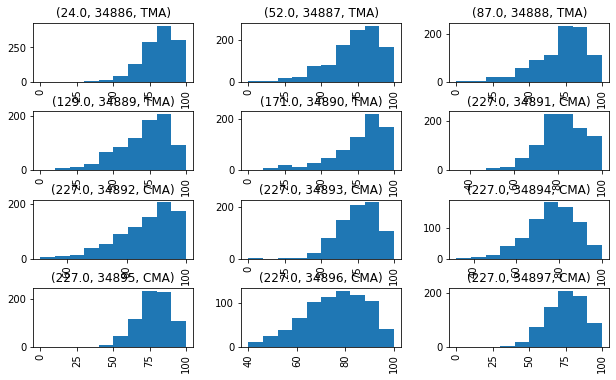

Code module: GGG, code presentation: 2013J
Number of students: 819


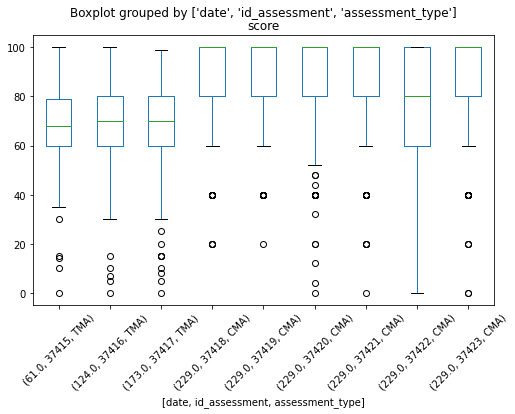

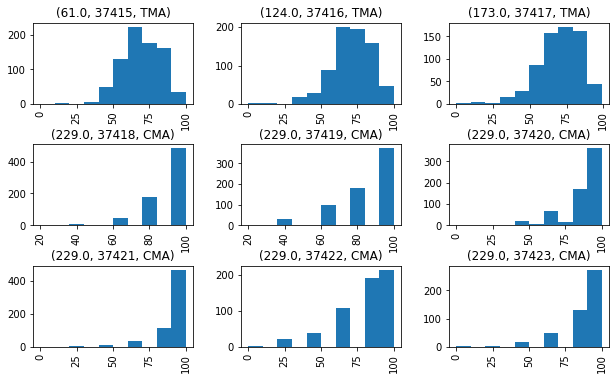

Code module: GGG, code presentation: 2014J
Number of students: 604


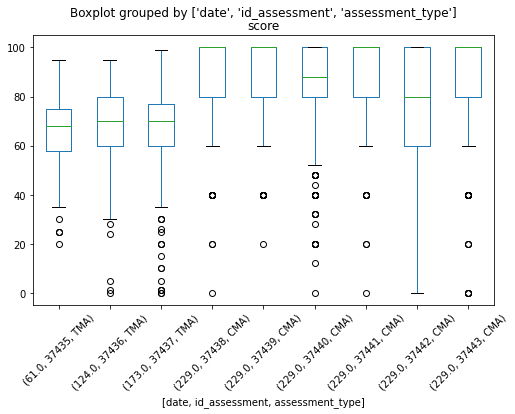

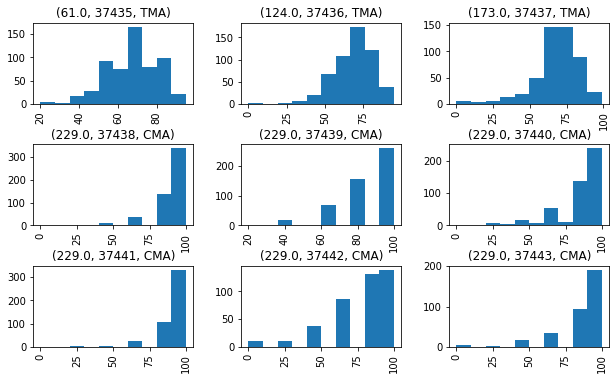

Code module: GGG, code presentation: 2014B
Number of students: 689


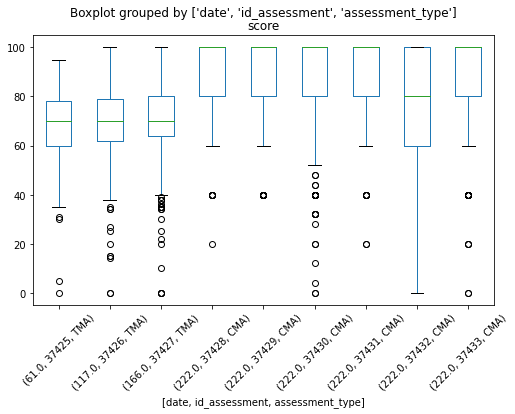

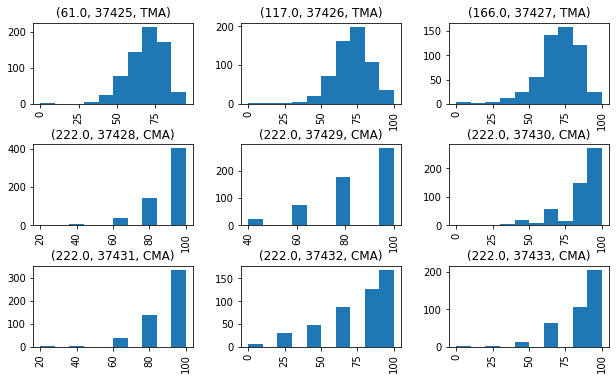

In [36]:
"""# iterate through all the different courses to plot and visualize
for index, row in courses_df.iterrows(): 
    code_module = row['code_module']
    code_presentation = row['code_presentation']
    print(f"Code module: {code_module}, code presentation: {code_presentation}")
    plot_module_assessment_stats(code_module, code_presentation)"""

## We pick 3 courses, that does not have an exam, to predict results on
- Code_module = BBB, code_presentation = 2013J
- Code_module = DDD, code_presentation = 2014J
- Code_module = EEE, code_presentation = 2013J

Code module: BBB, code presentation: 2013J
Number of students: 1710


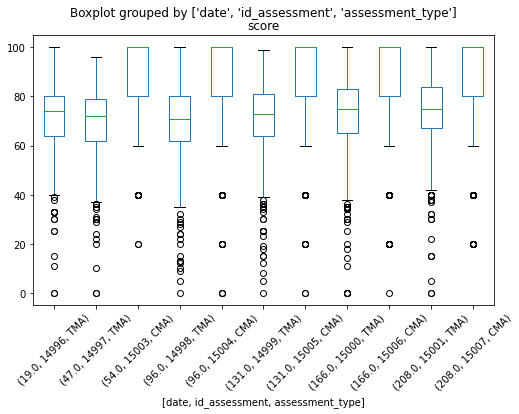

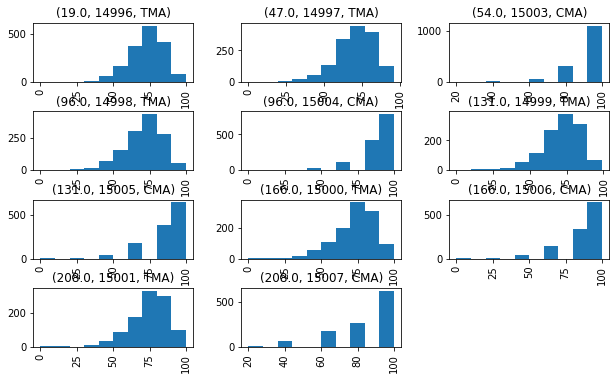

Code module: DDD, code presentation: 2014J
Number of students: 1428


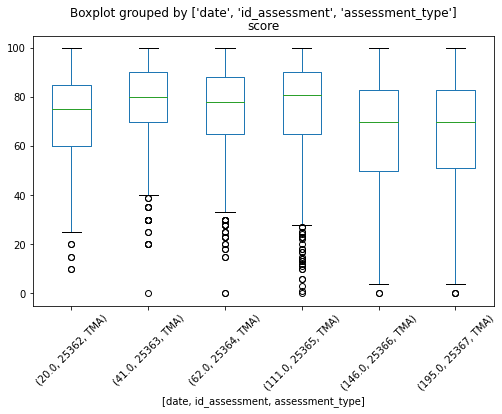

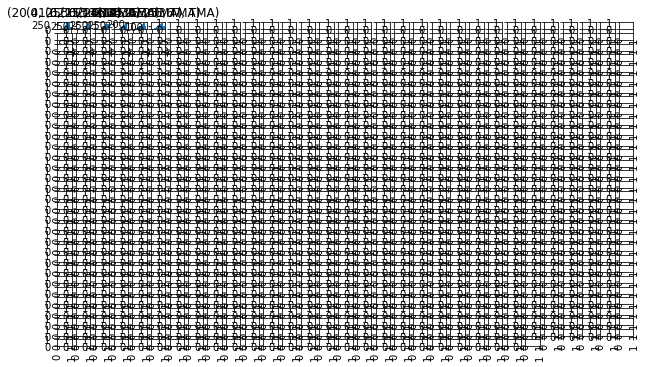

Code module: EEE, code presentation: 2013J
Number of students: 827


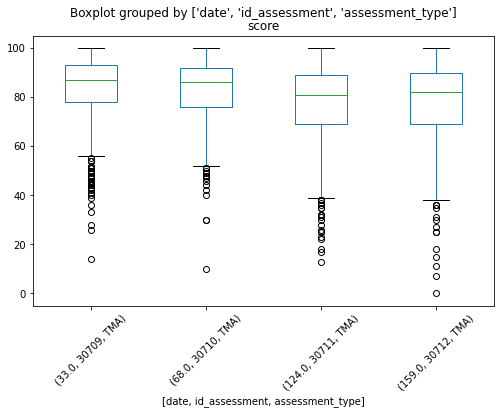

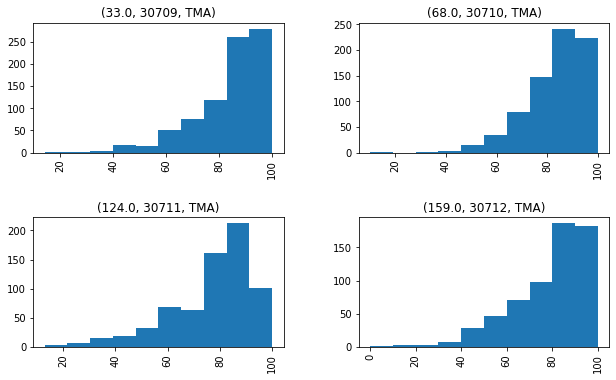

In [9]:
for code_module, code_presentation in zip(['BBB', 'DDD', 'EEE'], ['2013J', '2014J', '2013J']): 
    print(f"Code module: {code_module}, code presentation: {code_presentation}")
    plot_module_assessment_stats(code_module, code_presentation)

## Find VLE statistics for each course

In [10]:
# first join studentVLE with vle to get full view of vle activity
merged_vle_df = pd.merge(studentVle_df, vle_df, on = ['id_site', 'code_module', 'code_presentation'], how='left')

In [11]:
merged_vle_df

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
3,AAA,2013J,28400,546614,-10,11,homepage,NaN,NaN
4,AAA,2013J,28400,546714,-10,1,oucontent,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,NaN,NaN
10655276,GGG,2014J,675578,896943,269,1,homepage,NaN,NaN
10655277,GGG,2014J,654064,896943,269,3,homepage,NaN,NaN
10655278,GGG,2014J,654064,896939,269,1,forumng,NaN,NaN


In [38]:
code_module = 'BBB'
code_presentation = '2013J'

In [39]:
course_vle_df = merged_vle_df[(merged_vle_df.code_module==code_module)&(merged_vle_df.code_presentation==code_presentation)]

In [40]:
course_vle_df

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to
753564,BBB,2013J,560773,704206,-23,1,resource,NaN,NaN
753565,BBB,2013J,560773,704205,-23,1,resource,NaN,NaN
753566,BBB,2013J,560773,704204,-23,1,resource,NaN,NaN
753567,BBB,2013J,560773,704203,-23,1,resource,NaN,NaN
753568,BBB,2013J,560773,704207,-23,1,resource,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1206197,BBB,2013J,610362,703721,268,1,homepage,NaN,NaN
1206198,BBB,2013J,607914,703721,268,2,homepage,NaN,NaN
1206199,BBB,2013J,607914,703732,268,1,forumng,NaN,NaN
1206200,BBB,2013J,607914,703732,268,2,forumng,NaN,NaN


In [289]:
def get_click_matrix(student_id, course_vle_df, number_of_weeks, first_active_day, activities): 
    oneStudentVle = course_vle_df.loc[student_id, :]
    click_matrix = np.zeros((number_of_weeks, len(activities)))

    # insert clicks
    for i, vle_row in oneStudentVle.iterrows(): 
        # extract matrix indecies
        week_index = int((vle_row['date']-first_active_day)/7)
        resource_index = activities.index(vle_row['activity_type'])
        # add clicks to right cell
        click_matrix[week_index, resource_index] += vle_row['sum_click']
        
    return click_matrix

def get_assessment_scores(student_id, module_assessments_df, assessment_tuples): 
    assessment_scores = np.zeros(len(assessment_tuples))
    #assessment_scores = list(module_assessments_df.loc[module_assessments_df['id_student']==student_id].sort_values(by='date')['score', 'assessment_type', 'date'])
    student_assessments_df = module_assessments_df.loc[module_assessments_df['id_student']==student_id, ['score', 'assessment_type', 'date']]
    student_assessments = list(np.unique(np.array(student_assessments_df.to_records(index = False))))
    for student_score in student_assessments: 
        assessment_scores[assessment_tuples.index((student_score[1], student_score[2]))] = student_score[0]/100
    
    
    return assessment_scores

In [290]:
# extrect activity types
activities = list(set(course_vle_df['activity_type']))

#extract days
days = sorted(list(set(course_vle_df['date'])))
first_active_day, last_active_day = days[0], days[-1]
duration_in_days = last_active_day-first_active_day
number_of_weeks = int(duration_in_days/7)+1

# set stuend id as index in vle-course dataframe
#course_vle_df = course_vle_df.set_index('id_student')

# extract assessments from mudule
module_assessments_df = merged_assessment_df[(merged_assessment_df.code_module==code_module)&(merged_assessment_df.code_presentation==code_presentation)]
#assessment_tuples = sorted(list(set([(row['assessment_type'], row['date']) for index, row in module_assessments_df.iterrows()])), key = lambda x: x[1])
assessment_tuples = sorted(list(np.unique(np.array(module_assessments_df[['assessment_type', 'date']].to_records(index = False)))), key = lambda x: x[1])
assessment_tuples = [tuple(assessment) for assessment in assessment_tuples]


In [291]:
student_id = 560773
student_click_matrix = get_click_matrix(student_id, course_vle_df, number_of_weeks, first_active_day, activities)
assessment_scores = get_assessment_scores(student_id, module_assessments_df, assessment_tuples)

In [292]:
assessment_scores

array([0.79, 0.78, 1.  , 1.  , 0.93, 1.  , 0.  , 1.  , 0.87, 1.  , 0.74])

In [321]:
student_ids = list(set(course_vle_df.index))
x, y = [], []
for student_id in student_ids: 
    try: 
        click_matrix = get_click_matrix(student_id, course_vle_df, number_of_weeks, first_active_day, activities)
        assessments = get_assessment_scores(student_id, module_assessments_df, assessment_tuples)
        if (not np.isnan(np.sum(assessments))):
            x.append(np.transpose(click_matrix))
            y.append(assessments)
    except Exception as e: 
        print(student_id)
        print(e)
X = np.array(x)

516165
'Series' object has no attribute 'iterrows'
516447
'Series' object has no attribute 'iterrows'
583007
'Series' object has no attribute 'iterrows'
600211
'Series' object has no attribute 'iterrows'
600428
'Series' object has no attribute 'iterrows'
585915
'Series' object has no attribute 'iterrows'
594208
'Series' object has no attribute 'iterrows'
431071
'Series' object has no attribute 'iterrows'
521666
'Series' object has no attribute 'iterrows'
570862
'Series' object has no attribute 'iterrows'
595877
'Series' object has no attribute 'iterrows'
604079
'Series' object has no attribute 'iterrows'
588691
'Series' object has no attribute 'iterrows'


## Split data into training and test set

In [322]:
from sklearn.model_selection import train_test_split

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [324]:
# make datasets into torch tensors
X_train, y_train = torch.from_numpy(X_train).float(), torch.tensor(y_train).float()
X_test, y_test = torch.from_numpy(X_test).float(), torch.tensor(y_test).float()

# Pytorch model prediction

In [325]:
from torch import nn
import torch
import torch.optim as optim

In [326]:
class RNN(nn.Module): 
    def __init__(self, input_size, hidden_size, output_size, n_layers=1): 
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        #self.encoder = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(input_size, hidden_size, n_layers, bidirectional = True)
        self.fc1 = nn.Linear(hidden_size*2, output_size)
        
    def forward(self, inp): 
        #e = self.encoder(inp)
        output, hidden = self.lstm(inp)
        
        x = self.fc1(output[:, -1, :])
        
        return x

In [351]:
# define model instance
rnn_net = RNN(X_train[0].shape[1], 16, y_train[0].shape[0], n_layers = 2)

# set loss function, optimizer and criterion
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn_net.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

### Train model

In [359]:
t_loss = []
v_loss = []

t_acc = []
v_acc = []

def avg(l):
    return sum(l)/len(l)

n_steps = 50
for i in range(n_steps):
    y_pred_train = rnn_net(X_train)
    loss_train = loss_fn(y_pred_train, y_train)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    # print loss
    print(loss_train.detach().numpy())

0.07083248
0.070671536
0.07053424
0.0703593
0.070187606
0.070038505
0.06983809
0.06968304
0.06955119
0.06941957
0.069248326
0.06906935
0.0689142
0.06876712
0.06862659
0.06849279
0.068356074
0.068217665
0.06807314
0.067937836
0.06779382
0.06765823
0.06753045
0.067395255
0.067258656
0.06711672
0.06698814
0.06690951
0.0667746
0.066618875
0.0665762
0.06652303
0.066421345
0.066161074
0.066075556
0.06598382
0.06577657
0.065673284
0.065575205
0.06533854
0.065149315
0.065054454
0.06493272
0.06479427
0.06467521
0.064534254
0.06439578
0.06454771
0.06425184
0.064109825


In [360]:
def evaluate(x_inp, y_out): 
    y_pred_test = rnn_net(x_inp)
    loss_test = loss_fn(y_pred_test, y_out)
    
    print("Evaluation loss: ", loss_test.detach().numpy())
    
    return loss_test.detach().numpy()

In [361]:
evaluate(X_test, y_test)

Evaluation loss:  0.10415667


array(0.10415667, dtype=float32)

In [362]:
y_pred_test = rnn_net(X_test)

In [363]:
y_pred_test[9], y_test[9]

(tensor([0.7338, 0.7168, 0.9209, 0.8523, 0.6815, 0.8115, 0.6699, 0.7908, 0.6611,
         0.7543, 0.5998], grad_fn=<SelectBackward>),
 tensor([0.7900, 0.7800, 1.0000, 1.0000, 0.7200, 1.0000, 0.8100, 0.8000, 0.8500,
         1.0000, 0.8800]))

In [364]:
y_pred_test[12], y_test[12]

(tensor([0.7344, 0.7159, 0.9207, 0.8509, 0.6800, 0.8096, 0.6684, 0.7880, 0.6586,
         0.7498, 0.5960], grad_fn=<SelectBackward>),
 tensor([0.8600, 0.7700, 1.0000, 1.0000, 0.8100, 1.0000, 0.1500, 1.0000, 0.9100,
         1.0000, 0.9400]))

## Testing rnns pytorch

In [126]:
# test lstm layer
rnn = nn.LSTM(10, 20, 2)
inp = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
c0 = torch.randn(2, 3, 20)

In [133]:
output, (hn, cn) = rnn(inp, (h0, c0))

In [134]:
output, hidden = rnn(inp)

In [135]:
inp.shape, output.shape, h0.shape, c0.shape

(torch.Size([5, 3, 10]),
 torch.Size([5, 3, 20]),
 torch.Size([2, 3, 20]),
 torch.Size([2, 3, 20]))

In [132]:
X_train.shape

torch.Size([1477, 42, 10])

In [146]:
output[:, -1, :].shape

torch.Size([5, 20])